In [5]:
!pip install tensorflow==1.14.0
!pip install numpy
!pip install pandas
!pip install sklearn

In [0]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
def create_model():
    # Create a neural network
    model = Sequential()
    model.add(Input((15,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [0]:
df = pd.read_csv("data.csv")
labels = df["status"]
df = df.drop(columns=["status", "spread1", "spread2", "D2", "PPE", "NHR", "RPDE", "DFA"], axis=1)
df[df.columns] = MinMaxScaler(feature_range=(0,1)).fit_transform(df[df.columns])

In [0]:
seed = 1337
X_train, X_test, Y_train, Y_test = train_test_split(df, labels, test_size=0.2, random_state=seed)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.25, random_state=seed)

In [10]:
model = create_model()
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), epochs=1000, callbacks=[early_stopping])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 117 samples, validate on 39 samples
Epoch 1/1000
117/117 [==============================] - 0s 1ms/sample - loss: 0.7046 - acc: 0.3248 - val_loss: 0.6845 - val_acc: 0.5897
Epoch 2/1000
117/117 [==============================] - 0s 127us/sample - loss: 0.6756 - acc: 0.6838 - val_loss: 0.6549 - val_acc: 0.7692
Epoch 3/1000
117/117 [==============================] - 0s 155us/sample - loss: 0.6449 - acc: 0.7436 - val_loss: 0.6299 - val_acc: 0.7692
Epoch 4/1000
117/117 [==============================] - 0s 121us/sample - loss: 0.6231 - acc: 0.7436 - val_loss: 0.6074 - val_acc: 0.7692
Epoch 5/1000
117/117 [==============================] - 0s 141us/sample - loss: 0.6016 - acc: 0.7436 - val_loss: 0.5885 - val_acc: 0.7692
Epoch 6/1000
117/117 [==============================] -

In [11]:
model.evaluate(X_test, Y_test)

39/39 [==============================] - 0s 153us/sample - loss: 0.2863 - acc: 0.9231


[0.2862705695323455, 0.9230769]

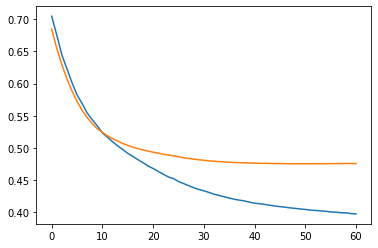

In [12]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

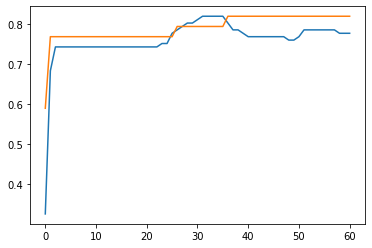

In [13]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])

In [0]:
model.save("model.hdf5")

In [0]:
from google.colab import files
files.download('model.hdf5') 